In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
df = pd.read_csv('data/Consumo_cerveja.csv',sep=';')

In [15]:
df.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [16]:
df.shape

(365, 7)

## Estatística descritiva

In [17]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.0+ KB


## Matriz de correlação

In [19]:
### O coeficiente de correlação é uma medida de correlação linear entre 2 variáveis e situa-se entre -1 e 1. 
#### -1 (associação negativa perfeita, enquanto um cresce outro diminui)
#### -1 (associação positiva perfeita)

In [20]:
df.corr()

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


Quando eu tenho uma correlação altissima entre 2 varaveis independentes não é bom para o modelo, podendo gerar problema. Evite de colocar as duas juntas.quando eu tenho uma correlação altissima entre 2 varaveis independentes não é bom para o modelo, podendo gerar problema.

## Plotar a variavel Y(consumo)

Para ver se não há quebra na estrutura, e observar ela e tomar uma decisão com base

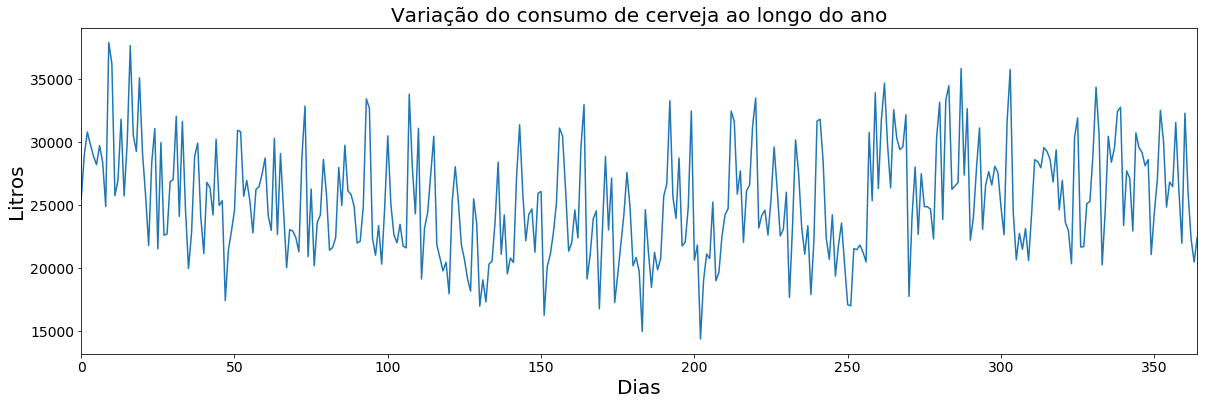

In [21]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_title('Variação do consumo de cerveja ao longo do ano',fontsize=20)
ax.set_ylabel('Litros',fontsize=20)
ax.set_xlabel('Dias',fontsize=20)
ax = df['consumo'].plot(fontsize=14)
#mostrar as variações do consumo, como ele se comportou ao longo do tempo.
#queda de estruturas são dificeis de modelar

## Boxplot

In [22]:
import seaborn as sns

Text(0, 0.5, 'Litros')

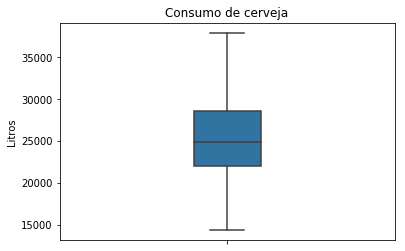

In [25]:
ax = sns.boxplot(df['consumo'],orient='v',width=0.2)
ax.set_title('Consumo de cerveja')
ax.set_ylabel('Litros')

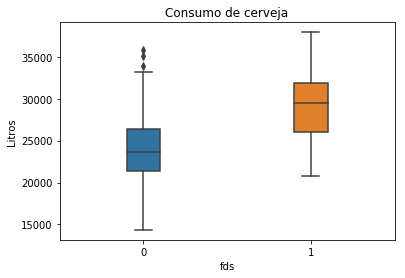

In [36]:
ax = sns.boxplot(x=df.fds, y=df.consumo,orient='v',width=0.2)
ax.set_title('Consumo de cerveja')
ax.set_ylabel('Litros')
ax.set_label('Final de semana')

## Distribuição de frequencias

Modelos de regressão linear assumem, inicialmente, que a variável dependente segue uma distribuição normal.

Quando fazemos uma pesquisa rápida no Google imagens de "curva normal", vemos mais ou menos como essa distribuição deve se comportar. Nem sempre esse é o comportamento obtido quando trabalhamos com dados reais.

Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal.

Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

Uma das funções da biblioteca seaborn para plotar o histograma de uma variável é a distplot() 

Text(0.5, 1.0, 'Consumo')

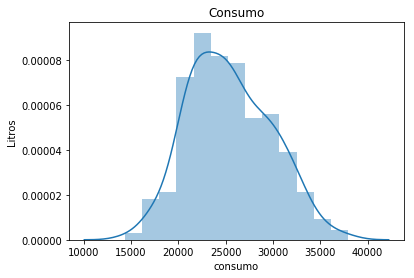

In [39]:
ax = sns.distplot(df['consumo'])
ax.set_ylabel('Litros')
ax.set_title('Consumo')

## Variavel dependente X Variavel Explicativa (pairplot)

Plotar o relacionamento entre pares de variaveis em um dataset

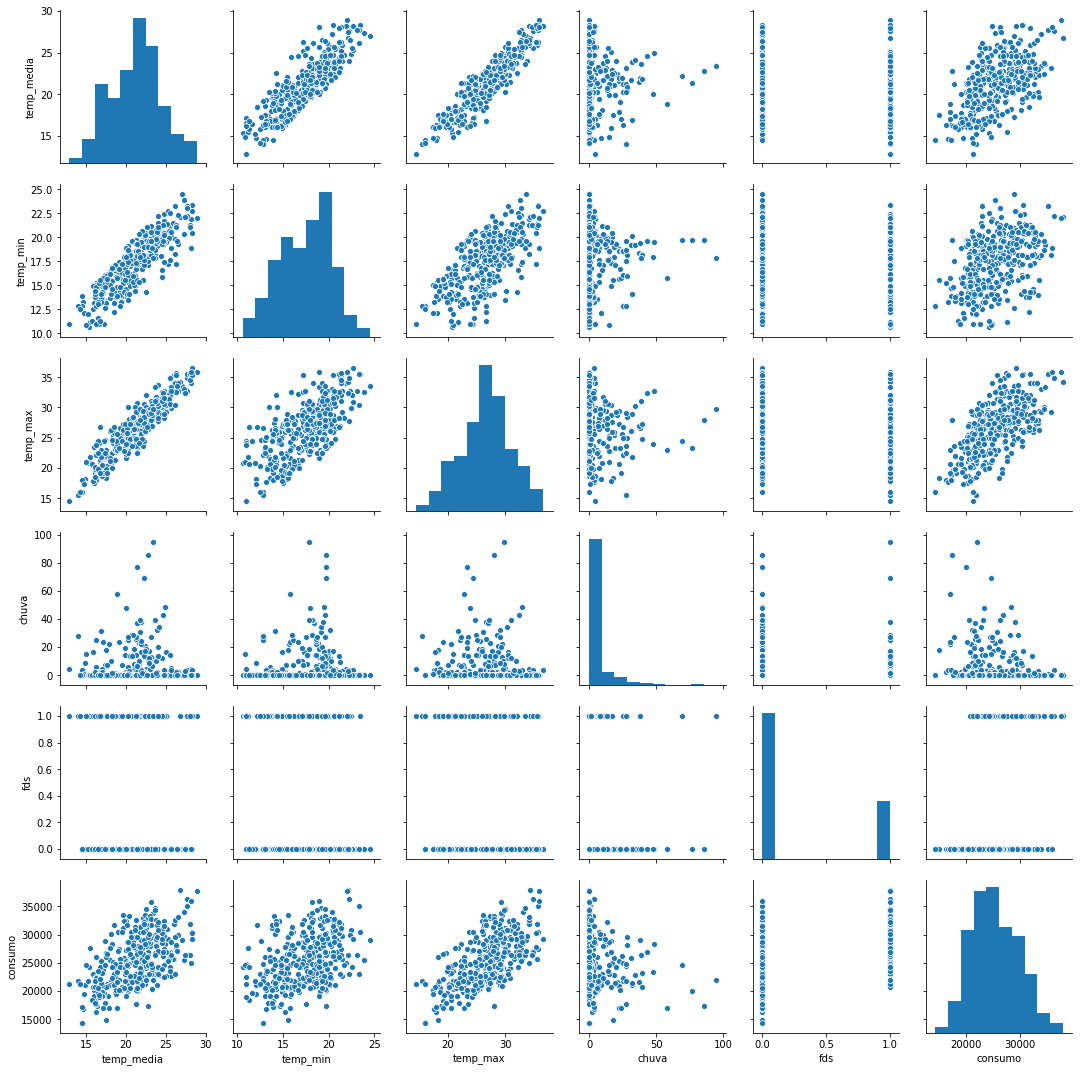

In [40]:
ax = sns.pairplot(df)

## Plotar pairplot usando somente uma variavel no eixo Y

Text(0.5, 1.05, 'Disperção entre as variaveis')

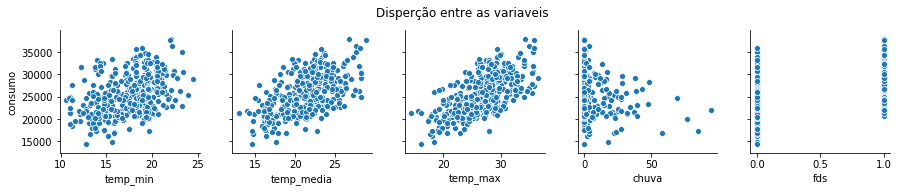

In [43]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Esse método faz mais de um tipo de dados, o 'scatter' apresentado acima e o 'reg'

Text(0.5, 1.05, 'Disperção entre as variaveis')

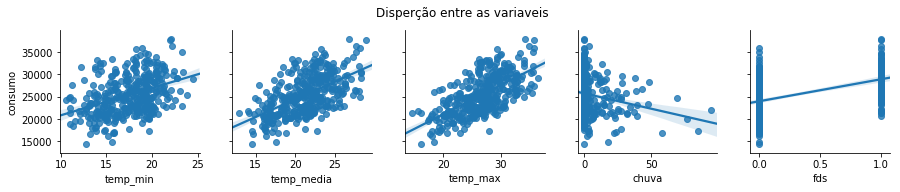

In [44]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'],kind='reg')
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)